<hr/>

<b>Notebook Summary</b>

These notes are based on Prof. Norman Wildberger's lectures on Dynamics on Graphs which can be found <a href="https://www.youtube.com/c/WildEggmathematicscourses/featured">here</a>. 
    
They notes are are being hosted at my website <a href="https://www.ladatavita.com/">ladatavita.com</a> and the Jupyter notebook is also available from my Github repo at: <a href="https://github.com/jgab3103/Jamie-Gabriel/tree/main/MathNotebooks">https://github.com/jgab3103/Jamie-Gabriel/tree/main/MathNotebooks</a>

The purpose of this notebook is a continuation where we left off in the previous notebook ES2, which compared the root populations of ADE graphs and ADE~ graph. 

This notebook will continue the investigation.... 

<hr/>

In [1]:
import pyvis.network as nt
import numpy as np
import sympy as sp
from IPython.display import HTML
import ipywidgets as widgets
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
mpl.rcParams['legend.fontsize'] = 10
import pandas as pd
import networkx as nx
import string
import random

<hr/>

<b>Aim</b>: Again, we introduce some functions from previous notebooks and add a new visualisation and function to introduce stable populations

<hr/>

<b>Let</b> $F1$ is a function that, given a list of edges will create a graph and randomly initialise a singleton population. 

<b>Let</b> $F2$ is a function that, given a list of edges and poopuations, will create a graph with the given population. 

<b>Let</b> $F3$ is a visualisation function that will render a graph with its population with label position offset

<b>Let</b> $F4$ is a function that, given a graph and node choice, will apply the $ps_x$ function to a single vertice

<b>Let</b> $F5$ is a function that will apply the $ps_x$ function to each node in succession over a chosen number of iterations

In [2]:
def F1(edges=None):
    
    verticeLabels = list(set([item for sublist in edges for item in sublist]))
    randomNumberToIntialiseSingletonPopulation = random.randint(0, len(verticeLabels) - 1)

    vertices = [(verticeLabels[i], {"population": 0}) for i in range(len(verticeLabels))]
    graph = nx.Graph()
    graph.add_nodes_from(vertices)
    graph.add_edges_from(edges)
    
    graph.nodes[verticeLabels[randomNumberToIntialiseSingletonPopulation]]['population'] = 1
    
    return(graph)

def F2(edges=None, population = None):
    
    verticesFoundInEdges = len(list(set([item for sublist in edges for item in sublist])))

    vertices = list(string.ascii_lowercase[0:verticesFoundInEdges])
    
    verticesWithPopulations = [(vertices[i], {"population": population[i]}) for i in range(len(vertices))]

    graph = nx.Graph()
    graph.add_nodes_from(verticesWithPopulations)
    graph.add_edges_from(edges)
    

    return(graph)
        
    
    
def F3(graph):
    x = {}
    pos = nx.spring_layout(graph)
    labels = nx.get_node_attributes(graph, 'population') 
    for i in labels:
        x[i] = "id=" + str(i) +" \npop=" + str(labels[i])
     # change margins if you adding    
    #plt.margins(x=0.2, y = 0.2) horizontalalignment='left'
    nx.draw(graph, pos, edge_color = "steelblue", node_color = "white")
    nx.draw_networkx_labels(graph, pos,  labels = x, font_size=10)

In [3]:
def F4(graph = None, nodeChoice = None, printSummary = True, 
       returnUpdatedGraph = False, 
       returnListOfPopulations = False,
      returnAllAsDict = False):
   
    edgesOfChosenNode = list(nx.edges(graph, [nodeChoice]))
   
    neigborOfChosenNode = [edgesOfChosenNode[i][1] for i in range(len(list(edgesOfChosenNode)))]
    nodeChoicePopulation = graph.nodes[nodeChoice]['population']
    sumOfNeighborsOfChosenNode = np.sum([graph.nodes[i]['population'] for i in neigborOfChosenNode])
    populationOfNode = -nodeChoicePopulation + sumOfNeighborsOfChosenNode
    updatedGraph = graph.copy()
    updatedGraph.nodes[nodeChoice]['population'] = populationOfNode

    newPopulations = [updatedGraph.nodes[i]['population'] for i in list(updatedGraph)]
    if printSummary:
        print("Node choice", 
              nodeChoice,
              "\nNode details",
              nx.nodes(graph)[nodeChoice],
              "\nChange in node population ",
              nx.nodes(graph)[nodeChoice]['population'], 
              "->", 
              populationOfNode)
        print("Updated node populations of graph: ", newPopulations, "\n")

    if returnUpdatedGraph: 
        return(updatedGraph)
    
    if returnListOfPopulations:
        return(np.array(newPopulations))
    
    if returnAllAsDict:
        return({"graph": updatedGraph,
               "population": np.array(newPopulations)})
    
def F5(graphChoice=None, vertices = [], iterations=5, returnPopulations = True, iterateThroughAllVertices = True):
    listOfAllPopulations = []
    graph = graphChoice
    
    if iterateThroughAllVertices:
        vertices = graph.nodes
    
    for i in range(iterations):
        for j in vertices:
            udpatedGraphAndPopulation = F4(graph, j, returnAllAsDict=True, printSummary = False)
            graph = udpatedGraphAndPopulation['graph']
            population = udpatedGraphAndPopulation['population']
            listOfAllPopulations.append(population)
            
    print("Number of unique populations: ", len(list(set([tuple(i) for i in [list(i) for i in listOfAllPopulations]]))))
    if returnPopulations:
        setOfAllPopulations = list(set([tuple(i) for i in [list(i) for i in listOfAllPopulations]]))
        return({"iterations":iterations,
               "populationAsSetCount":len(setOfAllPopulations),
                "populationAsListCount":len(listOfAllPopulations),
               "populationsAsSet": setOfAllPopulations,
               "populationsAsList": listOfAllPopulations})

<b>Observe</b> that we can test each of the functions with an example

<b>Let</b> $F6$ be a $D4 \text{~}$ graph

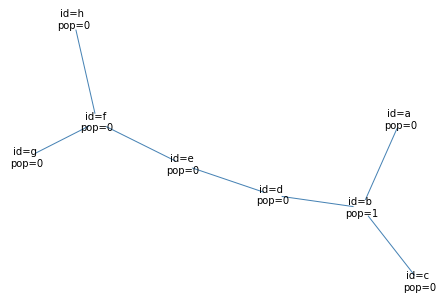

In [4]:
F6= F2(edges=[("a","b"),("b","c"),("b","d"),("d","e"),("e","f"),("f","g"), ("f","h")], 
       population=[0,1,0,0,0, 0, 0, 0,])
F3(F6)

In [5]:
F7 = F4(graph = F6, nodeChoice = 'c', printSummary = True, 
       returnUpdatedGraph = True)

F8 = F4(graph = F7, nodeChoice = 'a', printSummary = True, 
       returnUpdatedGraph = True)

F9 = F4(graph = F8, nodeChoice = 'd', printSummary = True, 
       returnUpdatedGraph = True)

F10 = F4(graph = F9, nodeChoice = 'e', printSummary = True, 
       returnUpdatedGraph = True)

F10 = F4(graph = F10, nodeChoice = 'f', printSummary = True, 
       returnUpdatedGraph = True)

F11 = F4(graph = F10, nodeChoice = 'h', printSummary = True, 
       returnUpdatedGraph = True)

F12 = F4(graph = F11, nodeChoice = 'g', printSummary = True, 
       returnUpdatedGraph = True)

F13 = F4(graph = F12, nodeChoice = 'f', printSummary = True, 
       returnUpdatedGraph = True)

F14 = F4(graph = F13, nodeChoice = 'e', printSummary = True, 
       returnUpdatedGraph = True)

F15 = F4(graph = F14, nodeChoice = 'd', printSummary = True, 
       returnUpdatedGraph = True)



Node choice c 
Node details {'population': 0} 
Change in node population  0 -> 1
Updated node populations of graph:  [0, 1, 1, 0, 0, 0, 0, 0] 

Node choice a 
Node details {'population': 0} 
Change in node population  0 -> 1
Updated node populations of graph:  [1, 1, 1, 0, 0, 0, 0, 0] 

Node choice d 
Node details {'population': 0} 
Change in node population  0 -> 1
Updated node populations of graph:  [1, 1, 1, 1, 0, 0, 0, 0] 

Node choice e 
Node details {'population': 0} 
Change in node population  0 -> 1
Updated node populations of graph:  [1, 1, 1, 1, 1, 0, 0, 0] 

Node choice f 
Node details {'population': 0} 
Change in node population  0 -> 1
Updated node populations of graph:  [1, 1, 1, 1, 1, 1, 0, 0] 

Node choice h 
Node details {'population': 0} 
Change in node population  0 -> 1
Updated node populations of graph:  [1, 1, 1, 1, 1, 1, 0, 1] 

Node choice g 
Node details {'population': 0} 
Change in node population  0 -> 1
Updated node populations of graph:  [1, 1, 1, 1, 1, 1, 

<b>Observe</b> that this iterative can get t this point: 

In [6]:
F16 = F4(graph = F15, nodeChoice = 'b', printSummary = True, 
       returnUpdatedGraph = True)


Node choice b 
Node details {'population': 1} 
Change in node population  1 -> 3
Updated node populations of graph:  [1, 3, 1, 2, 2, 2, 1, 1] 



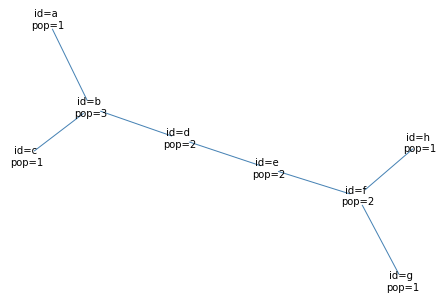

In [7]:
F3(F16)



<b>Let</b> $F17$ be some function that has created the inital graph. 



<b>Let</b> $F18$ be $D_4 \text{~}$ be a graph with a stable population

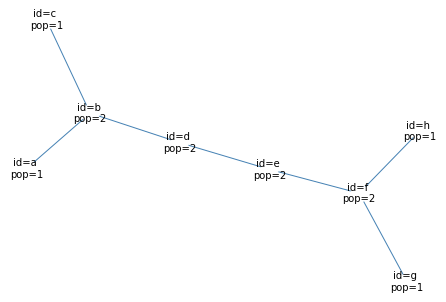

In [101]:
F18 = F2(edges=[("a","b"),("b","c"),("b","d"),("d","e"),("e","f"),("f","g"), ("f","h")], 
       population=[1,2,1,2,2, 2, 1, 1,])

F3(F18)


<b>Let</b> $F19$ be the graph population of $F6$, the  $D_4 \text{~}$ graph with a singeton population prior to mutation 


<b>Let</b> $F20$ be the graph population of $F16$, the $D_4 \text{~}$ graph after mutations have been applied at  $c, a, d, e, f, h, g, f, e, d, b$

<b>Let</b> $F21$ be the graph population of  $F18$, a $D_4 \text{~}$ (a $D_4 \text{~}$ graph with a stable population). 

In [112]:
F19 = np.array(list(nx.get_node_attributes(F6, 'population').values()))
F20 = np.array(list(nx.get_node_attributes(F16, 'population').values()))
F21 = np.array(list(nx.get_node_attributes(F18, 'population').values()))

<b>Observe</b> that the population after muationsat $c, a, d, e, f, h, g, f, e, d, b$ is the addtion of the singleton and stable popuations: 

In [113]:
F21 + F19 == F20

array([ True,  True,  True,  True,  True,  True,  True,  True])

<b>Observe</b> that the population afte rmutation   $c, a, d, e, f, h, g, f, e, d, b$ is:

$$P(F86) \equiv P(6) + P(16) $$ or (more intuively)

<b>Observe</b> that this could be written more intuively as: $P(D_4 \text{~ graph with singleton population}) + P(D_4 \text{~ graph with stable population}) =  P(D_4 \text{~ graph after mutations at c, a, d, e, f, h, g, f, e, d, b})  $  



<b>Observe</b>  that another way to think about this, a singleeon population applying a sequence of mutations, and these are linear transformations, so 

Let F22 be initial 
Let F23 be stable 
Let F24 be sequence of ienar transofmrations 

((F22 + F23) F24)F24 which can also be so fruther application sof w will increase the coeffeicnt of F23 and provide unboarded numer of populations
